# SIMPLE LINEAR REGRESSION _(SALARY vs. YEARSEXPERIENCE)_
---

```julia
versioninfo() # -> v"1.11.1"
```

In [1]:
cd(@__DIR__)

In [2]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


Import librairies

In [3]:
using CSV, DataFrames
using MLJ

Read data using .csv File. Convert it to `DataFrame` object

In [4]:
df = CSV.read("../../Datasets/Salary_Data.csv", DataFrame)

Row,YearsExperience,Salary
,Float64,Float64
1,1.1,39343.0
2,1.3,46205.0
3,1.5,37731.0
4,2.0,43525.0
5,2.2,39891.0
6,2.9,56642.0
7,3.0,60150.0
8,3.2,54445.0
9,3.2,64445.0


Unpacking features & target

In [5]:
x = df.YearsExperience
first(x, 5)

5-element Vector{Float64}:
 1.1
 1.3
 1.5
 2.0
 2.2

In [6]:
y = df.Salary
first(y, 5)

5-element Vector{Float64}:
 39343.0
 46205.0
 37731.0
 43525.0
 39891.0

Scatter Plot of `Salary` vs. `YearsExperience`

In [7]:
using Plots

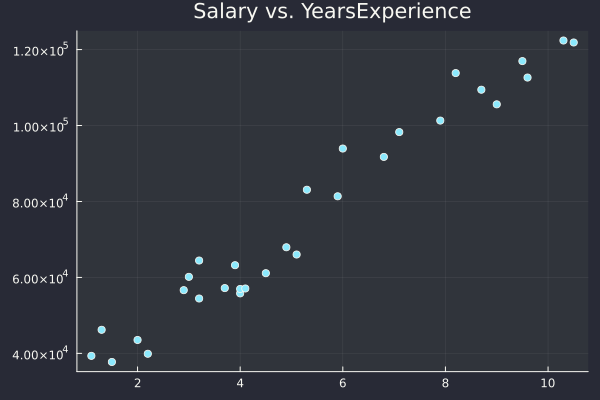

In [8]:
scatter(x, y, label=:none, title="Salary vs. YearsExperience")

Preparing the split

In [9]:
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=123)
xtrain, xtest = x[train], x[test]
ytrain, ytest = y[train], y[test]

([56957.0, 39343.0, 61111.0, 56642.0, 112635.0, 105582.0, 39891.0, 63218.0, 37731.0, 83088.0  …  67938.0, 81363.0, 57081.0, 46205.0, 93940.0, 121872.0, 98273.0, 64445.0, 116969.0, 101302.0], [55794.0, 109431.0, 43525.0, 91738.0, 60150.0, 57189.0])

Load & instantiate the linear regression object

In [10]:
LR = @load LinearRegressor pkg=MLJLinearModels
lr_ = LR()

[ Info: For silent loading, specify `verbosity=0`. 


import MLJLinearModels ✔


LinearRegressor(
  fit_intercept = true, 
  solver = nothing)

You may want to see [MLJLinearModels.jl](https://github.com/JuliaAI/MLJLinearModels.jl) and the unwrapped model type [`MLJLinearModels.LinearRegressor`](@ref).

Train & fit

In [11]:
lr = machine(lr_, Tables.table(xtrain), ytrain) |> fit!

[ Info: Training machine(LinearRegressor(fit_intercept = true, …), …).
┌ Info: Solver: MLJLinearModels.Analytical
│   iterative: Bool false
└   max_inner: Int64 200


trained Machine; caches model-specific representations of data
  model: LinearRegressor(fit_intercept = true, …)
  args: 
    1:	Source @510 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @416 ⏎ AbstractVector{Continuous}


Fitted parameters

In [12]:
fitted_params(lr)

(coefs = [:Column1 => 9380.393986173569],
 intercept = 26314.804542251157,)

Prediction

In [13]:
yhat = predict(lr, Tables.table(xtest))

6-element Vector{Float64}:
  63836.38048694543
 107924.2322219612
  45075.59251459829
  90101.48364823143
  54455.98650077186
  61022.262291093364

Error measurement

In [14]:
println("Error is $(sum( (yhat .- ytest).^2 ) ./ length(ytest) )")

Error is 1.985807424523024e7


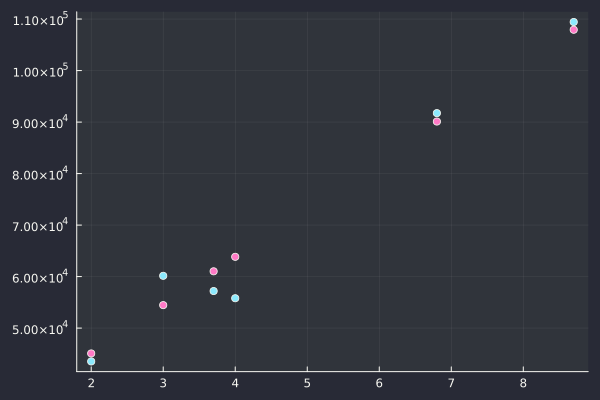

In [15]:
scatter(xtest, ytest, label=:none)
scatter!(xtest, yhat, label=:none)